In [1]:
import pandas as pd
import numpy as np
import datetime
from filegenerators import *
pd.options.display.float_format = '{:.2e}'.format
from pathlib import Path
from CovCor_calc import OptimaMechtest, OptimaOutput, OptimaSensitivity
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.6e}'.format)

In [3]:
"""
If ic=0 => absolute sigma => dataPoint variablestd = small error
If ic!=0 rel sigma => common properties => new property value = ln((val/1.5)/(val*1.5))/4
"""
def splitSigmas(df, must_be_zero, wide=False):
    rel_sigmas = {}
    cnt = 0
    for index, row in df.iterrows():
        if row.value in must_be_zero or (row.minconc == 0 and row.maxconc == 0):
            rel_sigmas[row.species.upper()] = 5e-14
        else:
            if wide:
                rel_sigmas[row.species.upper()] = ((row.maxconc-row.minconc)/8)*1e-12
            else:
                rel_sigmas[row.species.upper()] = ((row.value*1.5-row.value/2)/8)*1e-12
        cnt = cnt + 1
    print(cnt)
    return rel_sigmas

In [6]:
num_xmls = [25, 50, 100, 250, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]   # max(num_xmls) <= num_xml kell
date = datetime.datetime.now()
old_opps = []
new_opps = []

for num in num_xmls:
    opp_filename = f"2025525_BCRN_corr_{num}_old.opp" # Define output .opp file path
    opp_filename2 = f"2025525_BCRN_corr_{num}_new.opp" # Define output .opp file path

    old_opps.append(opp_filename)
    new_opps.append(opp_filename2)
old_opps, new_opps

(['2025525_BCRN_corr_25_old.opp',
  '2025525_BCRN_corr_50_old.opp',
  '2025525_BCRN_corr_100_old.opp',
  '2025525_BCRN_corr_250_old.opp',
  '2025525_BCRN_corr_500_old.opp',
  '2025525_BCRN_corr_600_old.opp',
  '2025525_BCRN_corr_700_old.opp',
  '2025525_BCRN_corr_800_old.opp',
  '2025525_BCRN_corr_900_old.opp',
  '2025525_BCRN_corr_1000_old.opp',
  '2025525_BCRN_corr_1100_old.opp',
  '2025525_BCRN_corr_1200_old.opp',
  '2025525_BCRN_corr_1300_old.opp'],
 ['2025525_BCRN_corr_25_new.opp',
  '2025525_BCRN_corr_50_new.opp',
  '2025525_BCRN_corr_100_new.opp',
  '2025525_BCRN_corr_250_new.opp',
  '2025525_BCRN_corr_500_new.opp',
  '2025525_BCRN_corr_600_new.opp',
  '2025525_BCRN_corr_700_new.opp',
  '2025525_BCRN_corr_800_new.opp',
  '2025525_BCRN_corr_900_new.opp',
  '2025525_BCRN_corr_1000_new.opp',
  '2025525_BCRN_corr_1100_new.opp',
  '2025525_BCRN_corr_1200_new.opp',
  '2025525_BCRN_corr_1300_new.opp'])

In [ ]:
old_results: dict[int, OptimaMechtest] = {}
new_results: dict[int, OptimaMechtest] = {}

for idx, opp_name in enumerate(old_opps):
    old_results[num_xmls[idx]] = OptimaMechtest(opp_name)   # each result object mapped to the num. of xmls used to create them

#for idx, opp_name2 in enumerate(new_opps):
#    new_results[num_xmls[idx]] = OptimaMechtest(opp_name2)

In [ ]:
df_species_ics = pd.read_excel('input_files/reactions_ics_finalised.xlsx', sheet_name='icranges')
df_species_ics['value'] = df_species_ics['value'].astype(float)

35

In [152]:
#inoputokat ki kell szedni
input_names =  ['nS', 'RAP', 'TG', 'dS', 'CCH', 'REF', 'Insulin', 'TG_SERCA', 'mTOR_RAP', 'casp', 'IP3R', 'Baxa', 'tBid']
must_be_zero = ['casp', 'Baxa', 'tBid', 'p53a', 'PUMA']
inputs = {}
for i in input_names:
    inputs[i] = 0.0
inputs["REF"] = 1.0
inputs["Insulin"] = 1e-10

In [153]:
input_data = pd.DataFrame([
    {'species': species, 'minconc': value, 'value': value, 'maxconc': value}
    for species, value in inputs.items()
])

In [162]:
lut = pd.concat([df_species_ics, input_data], ignore_index=True)    # look-up-table
lut['species'] = lut['species'].str.upper()
lut.shape

(84, 4)

In [167]:
naro_sigmas = splitSigmas(df=lut, must_be_zero=must_be_zero)
wide_sigmas = splitSigmas(df=lut, must_be_zero=must_be_zero, wide=True)
len(wide_sigmas)

84
84


80

In [21]:
new_results[25].sigmas[new_results[25].sigmas['!Experiment'] == 'stac_0001']
print(naro_sigmas['TSC'], wide_sigmas['AC'])

2.8125e-11 3.75e-11


In [168]:
new_results[25].df_basal
for _, row in lut.iterrows():
    if row.species not in naro_sigmas.keys():
        print(row.species)

In [170]:
volt = []
for _, row in lut.iterrows():
    if row.species in volt:
        print(row.species)
    volt.append(row.species)

CASP
IP3R
BAXA
TBID


In [ ]:
benne_van = False
for szar in new_results[25].sigmas['Point'] == 'UVG_BAX':
    if szar == True:
        benne_van = True
benne_van
# C++-ban tudok csak gondolkodni xDD

False

In [22]:
bcrn = OptimaMechtest("20250310_1k_cor.opp")

# saves sigmas into a dict
sigmas_dict = {}
for _, row in bcrn.sigmas[bcrn.sigmas['!Experiment']=="stac_0001"].iterrows():
    sigmas_dict[row['Point']] = row['Scale']

In [181]:
# calculates the distance between the measurements and normalise them with the appropriate sigma value
def sigma_range(meas, sim, sigma):
    radius = (sim-meas)/sigma
    #print(radius)
    return radius

In [83]:
for _, row in new_results[25].df_basal.iterrows():
    for k, v in row.items():
        print(f"[{k}: {v}]")

[x_AC: 2852.58998569573]
[x_AC_GA: 0.09999999958677373]
[x_AC_GAA: 0.0018055185130990672]
[x_AKT: 524.6026685990631]
[x_AKTA: 905.6861463429683]
[x_AMPK: 3811.2862066778557]
[x_AMPKA: 3.632077311356885]
[x_ATG5: 1914.2451168522257]
[x_ATG5T: 0.3565104124376568]
[x_ATG5_BCL2: 234.0977178588714]
[x_AUT: 0.6132052458315744]
[x_BAX: 12.173487461025308]
[x_BAXA: 5.1461154601134044e-08]
[x_BCL2: 1192.0124969062279]
[x_BCL2_BAX: 82.56794468512044]
[x_BCL2_PUMA: 517.8765865737738]
[x_BEC1: 1279.2450865540286]
[x_BEC1A: 7.306388013240337]
[x_BEC1_BCL2: 0.01687266516102673]
[x_BEC1_UVG: 48.84953392975465]
[x_BID: 4.422797374853428]
[x_CA2ER: -2.7680138125006162e-101]
[x_CA2IC: -1.4797840562011223e-99]
[x_CALPAIN: 107.65708634228385]
[x_CALPAINA: -5.885965285733459e-90]
[x_CAMKKB: 1230.722185290395]
[x_CAMKKBA: 0.09999999958677373]
[x_CAMP: 4.732618755960777e-06]
[x_CASP: 163.9511009226462]
[x_CCH: 0.0]
[x_CYTC: 4.183660275835637e-11]
[x_CYTCM: 302.09597948161417]
[x_DAPK: 800.3848290052866]
[x_D

In [ ]:
def isit_init(row, wide=False):
    for k, v in row.items():
        species = k[2:]  # remove the "x_" prefix
        right_row = lut[lut['species'] == species]

        if right_row.empty:
            print(f"Species '{species}' not found in lut — skipping.")
            continue    # ezekre: BEC1A, PI3K, PI3KA, SERCAA nincsen adat a ranges tablazatban

        meas = right_row['value'].iloc[0] * 1e-12

        if not wide:
            radius = sigma_range(meas=meas, sim=v*1e-12, sigma=naro_sigmas[species])
        else:
            radius = sigma_range(meas=meas, sim=v*1e-12, sigma=wide_sigmas[species])

        if radius >= 4:
            return False

    return True


In [218]:
all_ok = True
good_xmls = []

for xml_name, row in old_results[25].df_basal.iterrows():
    all_ok = isit_init(row)
    if all_ok:
        good_xmls.append([xml_name[7:16]])

len(good_xmls)

0

In [214]:

for col in new_results[25].df_basal.columns:
    if col[2:] not in lut['species'].values:
        print(col)

x_BEC1A
x_PI3K
x_PI3KA
x_SERCAA


In [ ]:
# dist block check if an xml has the simulations in the 4 sigma range or not

valid_simulations = []
current_sim = 'stac_0001'
all_valid = True
valid_res_vecs = []

grouped = bcrn.mechTRes.groupby(0)

for sim_id, sim_data in grouped:
    all_valid = True
    sim_vec = []
    
    for variable in sim_data[2].unique():
        var_data = sim_data[sim_data[2] == variable]
        
        row = var_data.iloc[-1]
        
        sigma = sigmas_dict[row[2]]
        meas = row[3]
        sim_val = row[4]
        radius = sigma_range(meas, sim_val, sigma)
        
        if radius >= 4:
            all_valid = False
            break
        sim_vec.append(sim_val)
    if all_valid:
        valid_simulations.append(sim_id)
        valid_res_vecs.append(sim_vec)
         

print(f"Found {len(valid_simulations)} valid simulations")

Found 876 valid simulations


In [ ]:
# calculates the correlation matrix
import numpy as np

variable_names = list(bcrn.mechTRes[2].unique())
results_vec = np.array(valid_res_vecs)
corr_matrix = np.corrcoef(results_vec.T)

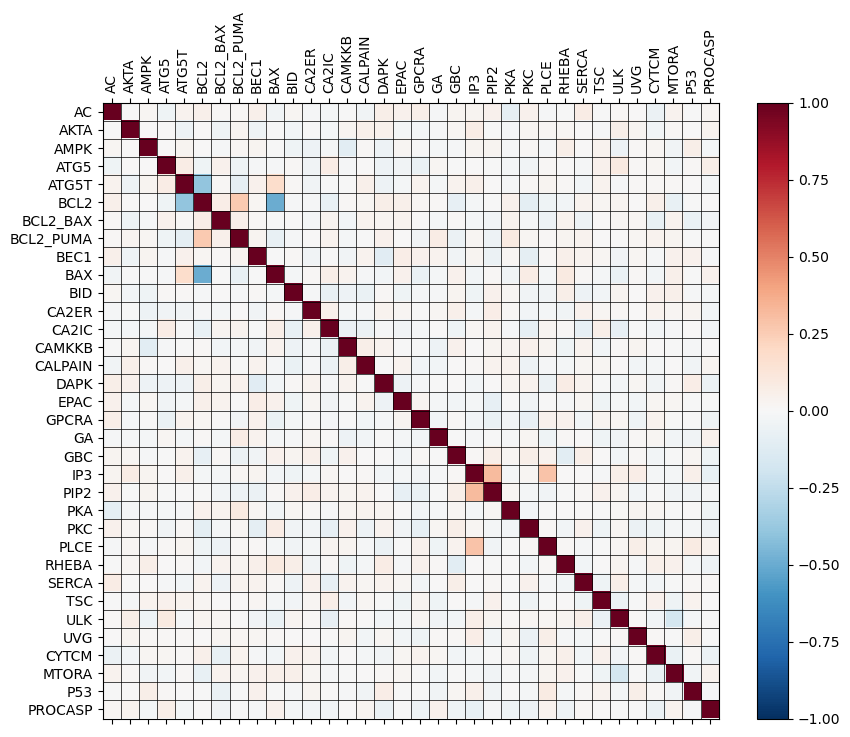

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(np.arange(len(variable_names)))
ax.set_yticks(np.arange(len(variable_names)))
ax.set_xticklabels(variable_names, rotation=90)
ax.set_yticklabels(variable_names)

ax.grid(False)
for i in range(len(variable_names)):
    ax.axhline(i - 0.5, color='black', linewidth=0.5)
    ax.axvline(i - 0.5, color='black', linewidth=0.5)